Stress Detection Python Project (Machine Learning)

In [2]:
import pandas as pd
import numpy as np
csv_url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv"

data = pd.read_csv(csv_url)
print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [3]:
# checking null values
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


Implies No Null values in this dataset


In [6]:
#preparation of the text column for cleaning the text column with stopwords, links,special symbols and language errors
import nltk
''' natural language toolkit
provides tools and resources for working with human language data (text).
It is a comprehensive library for natural language processing (NLP) and text
processing tasks
'''

import re

''' re library in Python, it refers to the regular expression module.
The re module is a standard library in Python that provides support for
regular expressions, which are powerful tools for pattern matching and text manipulation.
'''
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

def clean(text): #creating a function named clean
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www.\.\S+','',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text = re.sub('\n','',text)
  text = re.sub('\w*\d\w*','',text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = " ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text

data["text"] = data["text"].apply(clean)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


To check most used word in the data set with the help of WORD CLOUD.
A word cloud is a data visualization technique that shows the most used words in large font and the least used words in small font.

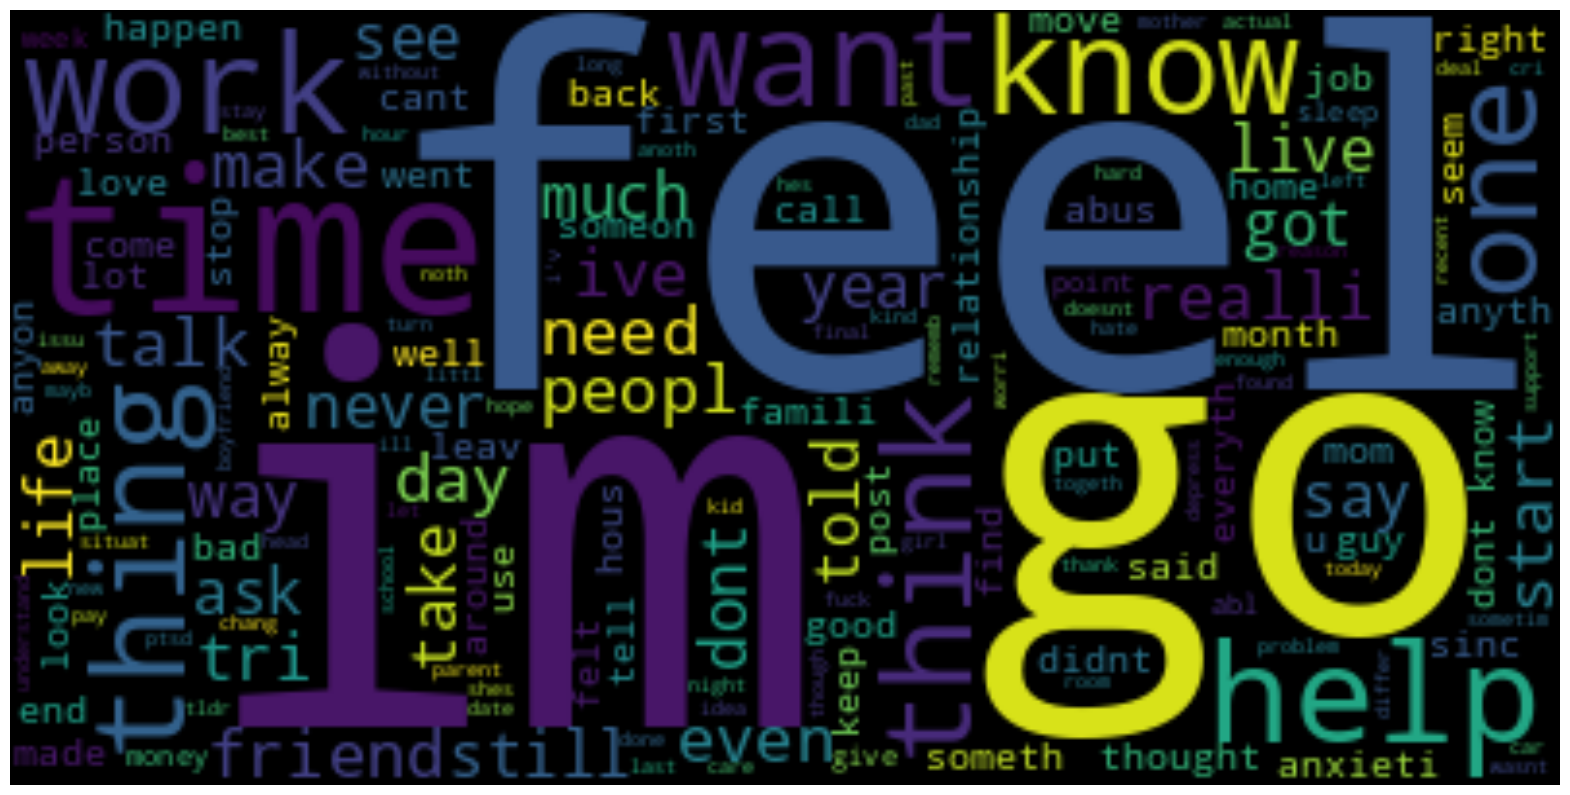

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="black").generate(text)
plt.figure( figsize = (20,15))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

So we infere that the most used words in this dataset are im, feel, time,work,go, know, help etc.

In [10]:
print(data['label'])
# 0 means no stress 1 means stress
# to change the notation from binary to text meanings

data['label']= data['label'].map({0:"No stress",1:"Stress"})
data = data[["text","label"]]
print(data.head())

0       1
1       0
2       1
3       1
4       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2838, dtype: int64
                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


Nex

next step is to split the data set in train and test sets

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size = 0.33,
                                                random_state = 42)

Since this is the problem of binary classification, Bernoulli Naive Bayes Algorithm is used which is one of the best algorithma for binary classification problems.

In [14]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

Testing the performance of the model on some random sentences based on Mental Health

In [16]:
#Output for stree
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: I feel helpless
['Stress']


In [18]:
#Output for NO stree
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: hello. how are you?
['No stress']


Result of the model that we built gives good results.
This is how one can train a stress detection model to detect stress from social media posts.